In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [209]:
courses = pd.read_csv("Coursera_courses.csv")
reviews = pd.read_csv("Coursera_reviews.csv")

In [3]:
courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
courses.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


+ unique courses = 622
+ unique institutions = 134

In [5]:
reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [6]:
reviews.describe(include='all')

,reviews,reviewers,date_reviews,rating,course_id
count,1454571,1454711,1454711,1.454711e+06,1454711
unique,458277,287808,1892,NaN,604
top,good,By Deleted A,"May 25, 2020",NaN,python
freq,8827,5412,5394,NaN,45218
mean,NaN,NaN,NaN,4.696649e+00,NaN
std,NaN,NaN,NaN,6.983271e-01,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,5.000000e+00,NaN
50%,NaN,NaN,NaN,5.000000e+00,NaN
75%,NaN,NaN,NaN,5.000000e+00,NaN


In [7]:
## courses not reviewed

courses_list = courses['course_id'].unique()
rev_course = reviews['course_id'].unique()

In [8]:
nr = []
for i in courses_list:
    if i not in rev_course:
        nr.append(i)


In [9]:
nr

['game-theory-1',
 'organizational-analysis',
 'algorithms-divide-conquer',
 'circular-economy',
 'edinburgh-music-theory',
 'unraveling-the-cycling-city',
 'marketing-plan',
 'changing-global-order',
 'mindfulness',
 'probabilistic-graphical-models',
 'marketing-analytics',
 'analytics-tableau',
 'international-law-in-action-2',
 'introduction-clinical-data',
 'digital-analytics',
 'dairy-production',
 'security-safety-globalized-world',
 'hotel-distribution',
 'data-science-course']

In [10]:
reviews['rating'].value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

KeyboardInterrupt: 

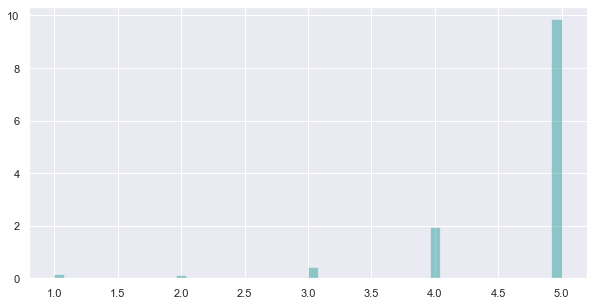

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(reviews['rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

In [12]:
reviews.isna().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [13]:
df = pd.merge(reviews, courses, on='course_id') 

In [14]:
df.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [15]:
df['date_reviews']=pd.to_datetime(df.date_reviews)

In [16]:
df['date_reviews']

0         2020-02-12
1         2020-09-28
2         2020-04-08
3         2020-02-24
4         2020-06-18
             ...    
1454706   2018-07-16
1454707   2018-06-13
1454708   2018-05-28
1454709   2018-05-28
1454710   2018-04-03
Name: date_reviews, Length: 1454711, dtype: datetime64[ns]

In [18]:
df_cp = df.copy()

In [19]:
df=df.drop_duplicates(['name'])

In [20]:
df.shape

(603, 8)

In [21]:
df.reset_index(inplace=True)

In [22]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['name'].apply(nfx.remove_stopwords)

In [23]:
df['clean_course_title']

0        CBRS Certified Professional Installer Google
1                                   Financial Markets
2                             Introduction Psychology
3      Programming Everybody (Getting Started Python)
4                      Bits Bytes Computer Networking
                            ...                      
598                                    Managing Coach
599                                  Machine Learning
600                                 Indigenous Canada
601                                Science Well-Being
602                    Technical Support Fundamentals
Name: clean_course_title, Length: 603, dtype: object

In [24]:
df

,index,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url,clean_course_title
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,CBRS Certified Professional Installer Google
1,87,This course is virtually worthless. I couldn't...,By James R,2019-04-23,1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Financial Markets
2,9005,"I am so sorry to say that the ""animation"" make...",By Jacquelin B,2018-12-10,1,introduction-psychology,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,Introduction Psychology
3,17431,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,Programming Everybody (Getting Started Python)
4,62649,"As a complete and utter beginner to IT, I feel...",By Kelley F,2018-10-26,1,computer-networking,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,Bits Bytes Computer Networking
...,...,...,...,...,...,...,...,...,...,...
598,1358894,"While the Facilitator may be knowledgeable, th...",By Michael B,2018-08-13,1,managing-as-a-coach,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,Managing Coach
599,1359710,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,machine-learning,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,Machine Learning
600,1395605,There are several reasons why I rated this cou...,By Art H,2017-11-21,1,indigenous-canada,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,Indigenous Canada
601,1399307,The course is mostly about the opinion of the ...,By Julia H,2018-05-01,1,the-science-of-well-being,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,Science Well-Being


In [25]:
df=df.drop(['index'],axis=1)

In [26]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['name'].apply(nfx.remove_stopwords)

In [27]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [28]:
df[['name','clean_course_title']]

,name,clean_course_title
0,Become a CBRS Certified Professional Installer...,CBRS Certified Professional Installer Google
1,Financial Markets,Financial Markets
2,Introduction to Psychology,Introduction Psychology
3,Programming for Everybody (Getting Started wit...,Programming Everybody Getting Started Python
4,The Bits and Bytes of Computer Networking,Bits Bytes Computer Networking
...,...,...
598,Managing as a Coach,Managing Coach
599,Machine Learning,Machine Learning
600,Indigenous Canada,Indigenous Canada
601,The Science of Well-Being,Science WellBeing


In [29]:
# Vectorize our Text
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_title'])

In [30]:
# Sparse
cv_mat

<603x1092 sparse matrix of type '<class 'numpy.int64'>'
	with 2347 stored elements in Compressed Sparse Row format>

In [31]:
cv_mat.shape

(603, 1092)

In [32]:
# Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
cv_mat.todense().shape

(603, 1092)

In [34]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())

In [35]:
df_cv_words.head()

,101,1760,1910,21st,911,abcs,abdomen,abogado,aboriginal,abstract,...,worlds,worldviews,write,writing,wrong,yoga,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [37]:
cosine_sim_mat.shape

(603, 603)

In [ ]:
# course_indices_df = df.drop_duplicates(['name'])

In [38]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['name']).drop_duplicates()

In [39]:
course_indices

name
Become a CBRS Certified Professional Installer by Google      0
Financial Markets                                             1
Introduction to Psychology                                    2
Programming for Everybody (Getting Started with Python)       3
The Bits and Bytes of Computer Networking                     4
                                                           ... 
Managing as a Coach                                         598
Machine Learning                                            599
Indigenous Canada                                           600
The Science of Well-Being                                   601
Technical Support Fundamentals                              602
Length: 603, dtype: int64

In [40]:
idx =course_indices['Managing Project Risks and Changes']

In [41]:
idx

368

In [42]:
scores = list(enumerate(cosine_sim_mat[idx]))

In [43]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.25),
 (12, 0.35355339059327373),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.2886751345948

In [44]:
# Sort our scores per cosine score
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [45]:
sorted_scores[1:]

[(12, 0.35355339059327373),
 (122, 0.35355339059327373),
 (165, 0.35355339059327373),
 (598, 0.35355339059327373),
 (81, 0.2886751345948129),
 (125, 0.2886751345948129),
 (583, 0.2886751345948129),
 (11, 0.25),
 (275, 0.22360679774997896),
 (233, 0.20412414523193154),
 (592, 0.20412414523193154),
 (214, 0.1889822365046136),
 (83, 0.17677669529663687),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.

In [46]:
# Selected Courses Indices
selected_course_indices = [i[0] for i in sorted_scores[1:]]

In [47]:
selected_course_indices

[12,
 122,
 165,
 598,
 81,
 125,
 583,
 11,
 275,
 233,
 592,
 214,
 83,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,


In [52]:
# Selected Courses Scores
selected_course_scores = [i[1] for i in sorted_scores[1:]]

In [53]:
recommended_result = df['name'].iloc[selected_course_indices]

In [54]:
rec_df = pd.DataFrame(recommended_result)

In [55]:
rec_df.head()

,name
12,Project Launch
122,Project Planning
165,Project Execution
598,Managing as a Coach
81,Managing the Company of the Future


In [56]:
rec_df['similarity_scores'] = selected_course_scores

In [57]:
rec_df

,name,similarity_scores
12,Project Launch,0.353553
122,Project Planning,0.353553
165,Project Execution,0.353553
598,Managing as a Coach,0.353553
81,Managing the Company of the Future,0.288675
...,...,...
597,Introduction to Molecular Spectroscopy,0.000000
599,Machine Learning,0.000000
600,Indigenous Canada,0.000000
601,The Science of Well-Being,0.000000


In [58]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['name'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)

In [59]:
recommend_course('Building Modern Python Applications on AWS',20)

,name,similarity_scores
360,Building Containerized Applications on AWS,0.670820
395,Основы программирования на Python,0.447214
593,Математика и Python для анализа данных,0.447214
93,Python Basics,0.316228
192,Using Databases with Python,0.316228
281,Introducción a la programación en Python I: Ap...,0.269680
6,Crash Course on Python,0.258199
23,Python Data Structures,0.258199
121,Data Analysis with Python,0.258199
129,Machine Learning with Python,0.258199


In [60]:
df2 = pd.merge(reviews, courses, on='course_id') 

In [63]:
df2.head(
    
)

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [64]:
df2['date_reviews']=pd.to_datetime(df2.date_reviews)

In [65]:
df3 = df2[['date_reviews','reviewers','name','rating']]

In [66]:
df3.head()

,date_reviews,reviewers,name,rating
0,2020-02-12,By Robert S,Become a CBRS Certified Professional Installer...,4
1,2020-09-28,By Gabriel E R,Become a CBRS Certified Professional Installer...,4
2,2020-04-08,By Jacob D,Become a CBRS Certified Professional Installer...,4
3,2020-02-24,By Dale B,Become a CBRS Certified Professional Installer...,4
4,2020-06-18,By Sean G,Become a CBRS Certified Professional Installer...,4


In [67]:
df3.describe(include='all')

,date_reviews,reviewers,name,rating
count,1454711,1454711,1454711,1.454711e+06
unique,1892,287808,603,NaN
top,2020-05-25 00:00:00,By Deleted A,Programming for Everybody (Getting Started wit...,NaN
freq,5394,5412,45218,NaN
first,2015-08-07 00:00:00,NaN,NaN,NaN
last,2020-10-10 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.696649e+00
std,NaN,NaN,NaN,6.983271e-01
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,5.000000e+00


In [68]:
df3.drop_duplicates(subset=["reviewers", "name"],inplace=True)

In [69]:
df3['reviewers']

0             By Robert S
1          By Gabriel E R
2              By Jacob D
3               By Dale B
4               By Sean G
                ...      
1454656     By George B S
1454657    By Abubakarr K
1454658        By MD. I H
1454659       By James  K
1454660      By Eduardo R
Name: reviewers, Length: 506077, dtype: object

In [70]:
df3['reviewers']=df3['reviewers'].map(lambda x: " ".join((x.split(" ")[1:])))

In [71]:
df3['reviewers']

0             Robert S
1          Gabriel E R
2              Jacob D
3               Dale B
4               Sean G
              ...     
1454656     George B S
1454657    Abubakarr K
1454658        MD. I H
1454659       James  K
1454660      Eduardo R
Name: reviewers, Length: 506077, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
lab.fit(df3['reviewers'])
df3['reviewers'] = lab.transform(df3['reviewers'])

In [73]:
len(df3['reviewers'].unique())

287808

In [74]:
import joblib

joblib.dump(lab, 'label_encoder.joblib')
label_encoder = joblib.load('label_encoder.joblib')

In [75]:
# lab.inverse_transform(df3['reviewers'][:2])

In [76]:
#create instance of label encoder
lab_m = LabelEncoder()

#perform label encoding on 'team' column
lab_m.fit(df3['name'])
df3['name'] = lab_m.transform(df3['name'])

In [77]:
joblib.dump(lab_m, 'label_encoder_m.joblib')
label_encoder_m = joblib.load('label_encoder_m.joblib')

In [78]:
df3['rank_latest'] = df3.groupby(['reviewers'])['date_reviews'] \
                                .rank(method='first', ascending=False)

In [79]:
df3.head()

,date_reviews,reviewers,name,rating,rank_latest
0,2020-02-12,200024,40,4,20.0
1,2020-09-28,79956,40,4,1.0
2,2020-04-08,101446,40,4,4.0
3,2020-02-24,53579,40,4,1.0
4,2020-06-18,215309,40,4,1.0


In [80]:
lab_m.inverse_transform(df3['name'][0:1])

array(['Become a CBRS Certified Professional Installer by Google'],
      dtype=object)

In [82]:
users = df3.reviewers.unique()
nb_users = len(users)

courses = df3.name.unique()
nb_courses = len(courses)

In [83]:
df3.rename(columns={'reviewers':'user_id','name':'item_id'},inplace=True)

In [84]:
df3['rating'].value_counts()

5    395517
4     80334
3     17595
1      6589
2      6042
Name: rating, dtype: int64

In [85]:
df3.head()

,date_reviews,user_id,item_id,rating,rank_latest
0,2020-02-12,200024,40,4,20.0
1,2020-09-28,79956,40,4,1.0
2,2020-04-08,101446,40,4,4.0
3,2020-02-24,53579,40,4,1.0
4,2020-06-18,215309,40,4,1.0


In [165]:
train_ratings = df3[df3['rank_latest'] != 1]
test_ratings = df3[df3['rank_latest'] == 1]

In [167]:
# drop columns that we no longer need
train_ratings = train_ratings[['user_id', 'item_id', 'rating']]
test_ratings = test_ratings[['user_id', 'item_id', 'rating']]

In [156]:
df3.shape

(506077, 5)

In [157]:
X_train_ratings = train_ratings.drop('rating',axis=1)

In [158]:
y_train_ratings=train_ratings['rating']

In [159]:
X_test_ratings = test_ratings.drop('rating',axis=1)

In [160]:
y_test_ratings = test_ratings['rating']

In [93]:
# import sklearn

In [94]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.under_sampling import TomekLinks
# from imblearn.under_sampling import OneSidedSelection
# from collections import Counter

In [95]:

# print('Original dataset shape {}'.format(Counter(y)))

In [96]:
# smt = OneSidedSelection(sampling_strategy="majority")

In [97]:
# X_res, y_res = smt.fit_resample(X,y)


In [98]:
# print('Resampled dataset shape {}'.format(Counter(y_res)))

In [99]:
# rus = RandomUnderSampler(random_state=42,sampling_strategy='auto')

In [100]:
# X_res, y_res = rus.fit_resample(X,y)

In [101]:
# print('Resampled dataset shape {}'.format(Counter(y_res)))

In [102]:
# X_train, X_test,y_train, y_test = train_test_split(X_res,y_res, test_size=0.33, random_state=42)

In [103]:
X_train_initial, X_train_update, y_train_initial,y_train_update= train_test_split(X_train_ratings,y_train_ratings , test_size=0.33, random_state=42)

In [104]:
print(nb_courses,nb_users)

603 287808


In [105]:
# training_set= train.to_numpy()
# testing_set = test.to_numpy()

In [106]:
# train_set = utl.convert(training_set, nb_users, nb_courses)
# test_set = utl.convert(testing_set, nb_users, nb_courses)

In [107]:
# print('Shape of final training set: (list of users x list of all courses):', len(train_set), len(train_set[0]))
# print('Shape of final test set:     (list of users x list of all courses):', len(test_set), len(test_set[0]))


In [108]:
# ! pip install matrix_factorization

In [109]:
from matrix_factorization import BaselineModel, KernelMF, train_update_test_split

import pandas as pd
from sklearn.metrics import mean_squared_error

In [110]:
# X = df3[["user_id", "item_id"]]
# y = df3["rating"]

In [111]:
# Prepare data for online learning
# (
#     X_train_initial,
#     y_train_initial,
#     X_train_update,
#     y_train_update,
#     X_test_update,
#     y_test_update,
# ) = train_update_test_split(df3 ,frac_new_users=0.2)

In [112]:
# X_train_initial = train_init[["user_id", "item_id"]]
# y_train_initial = train_init["rating"]

In [113]:
# # Initial training
# matrix_fact = KernelMF(n_epochs=5, n_factors=150, verbose=1, lr=0.001, reg=0.005)
# matrix_fact.fit(X_train_initial, y_train_initial)

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
params = dict(n_factors = [25,40],reg=[0.005,0.003,0.007])


In [116]:
matrix_fact =KernelMF(n_epochs=30)


In [ ]:
# clf = RandomizedSearchCV(matrix_fact, params, random_state=0,cv=5,n_iter=5,scoring = 'r2')

In [ ]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [ ]:
# search=clf.fit(X_train_initial, y_train_initial)

In [ ]:
# search.best_params_

In [ ]:
# search.best_score_

In [117]:
# Initial training
matrix_fact = KernelMF(n_epochs=100, n_factors=25, verbose=1, lr=0.001, reg=0.007)
matrix_fact.fit(X_train_initial, y_train_initial)

Epoch  1 / 100  -  train_rmse: 0.7375393490706967
Epoch  2 / 100  -  train_rmse: 0.7313541426789338
Epoch  3 / 100  -  train_rmse: 0.7275755152416938
Epoch  4 / 100  -  train_rmse: 0.7247654707198691
Epoch  5 / 100  -  train_rmse: 0.7224771848131549
Epoch  6 / 100  -  train_rmse: 0.7204838770063143
Epoch  7 / 100  -  train_rmse: 0.7186951455459952
Epoch  8 / 100  -  train_rmse: 0.7170574029793939
Epoch  9 / 100  -  train_rmse: 0.7155221205037602
Epoch  10 / 100  -  train_rmse: 0.7140817788958079
Epoch  11 / 100  -  train_rmse: 0.7126806543438343
Epoch  12 / 100  -  train_rmse: 0.7113243332530276
Epoch  13 / 100  -  train_rmse: 0.7100199851396514
Epoch  14 / 100  -  train_rmse: 0.708754433557394
Epoch  15 / 100  -  train_rmse: 0.7074985062284823
Epoch  16 / 100  -  train_rmse: 0.7062823048997915
Epoch  17 / 100  -  train_rmse: 0.705086403060205
Epoch  18 / 100  -  train_rmse: 0.7039041414998505
Epoch  19 / 100  -  train_rmse: 0.7027507578614971
Epoch  20 / 100  -  train_rmse: 0.70158730

KernelMF(gamma=0.04, lr=0.001, n_factors=25, reg=0.007)

In [118]:
# X_train_update = train_update[["user_id", "item_id"]]
# y_train_update = train_update["rating"]

In [119]:
# Update model with new users
matrix_fact.update_users(
    X_train_update, y_train_update, lr=0.001, n_epochs=100, verbose=1
)

Epoch  1 / 100  -  train_rmse: 0.7299953973130772
Epoch  2 / 100  -  train_rmse: 0.7269454431989205
Epoch  3 / 100  -  train_rmse: 0.7239744616758087
Epoch  4 / 100  -  train_rmse: 0.7210738406518503
Epoch  5 / 100  -  train_rmse: 0.7182391613409415
Epoch  6 / 100  -  train_rmse: 0.7154639562420355
Epoch  7 / 100  -  train_rmse: 0.7127436974690667
Epoch  8 / 100  -  train_rmse: 0.7100745118884246
Epoch  9 / 100  -  train_rmse: 0.7074544199902026
Epoch  10 / 100  -  train_rmse: 0.7048799141072173
Epoch  11 / 100  -  train_rmse: 0.70234756841637
Epoch  12 / 100  -  train_rmse: 0.6998563490599743
Epoch  13 / 100  -  train_rmse: 0.6974042762931325
Epoch  14 / 100  -  train_rmse: 0.6949895001395152
Epoch  15 / 100  -  train_rmse: 0.6926101536881406
Epoch  16 / 100  -  train_rmse: 0.6902662165026765
Epoch  17 / 100  -  train_rmse: 0.6879552582683056
Epoch  18 / 100  -  train_rmse: 0.6856771582905076
Epoch  19 / 100  -  train_rmse: 0.6834307635128467
Epoch  20 / 100  -  train_rmse: 0.68121475

In [120]:
# X_test_update = test[["user_id", "item_id"]]
# y_test_update = test["rating"]

In [121]:
pred = matrix_fact.predict(X_test_ratings)
rmse = mean_squared_error(y_test_ratings, pred, squared=False)
print(f"\nTest RMSE: {rmse:.4f}")


Test RMSE: 0.6632


In [123]:
temp=pd.DataFrame({'user':X_test_ratings['user_id'],'item':X_test_ratings['item_id'],'pred':pred,'act':y_test_ratings})

In [124]:
temp.head()

,user,item,pred,act
1,79956,40,4.792811,4
3,53579,40,4.792811,4
4,215309,40,4.823785,4
6,134718,40,4.788522,5
7,137030,40,4.792811,5


In [128]:
temp[temp['act']==1]

,user,item,pred,act
88,211673,195,4.792689,1
93,131817,195,4.792689,1
94,202521,195,4.792689,1
95,233013,195,4.792689,1
98,228359,195,4.792689,1
...,...,...,...,...
1419646,106913,530,4.767252,1
1419647,70808,530,4.687314,1
1419648,192552,530,4.864841,1
1419650,158193,530,4.791221,1


In [104]:
df3.shape

(506077, 5)

In [49]:
(matrix_fact.n_users)


68412

In [52]:
matrix_fact.n_items

592

In [129]:
# Get recommendations
user = 232767
items_known = X_train_initial.query("user_id == @user")["item_id"]
matrix_fact.recommend(user=user, items_known=items_known)

,user_id,item_id,rating_pred
469,232767,266,5.0
102,232767,132,5.0
356,232767,51,5.0
348,232767,569,5.0
110,232767,176,5.0
135,232767,482,5.0
366,232767,298,5.0
140,232767,195,5.0
62,232767,331,5.0
471,232767,171,5.0


In [130]:
items_known

848902    428
644378    465
Name: item_id, dtype: int32

In [131]:
X_train_initial[X_train_initial['user_id']==232767]

,user_id,item_id
848902,232767,428
644378,232767,465


In [58]:
X.shape

(219124, 2)

In [105]:
### deep learning based

In [177]:
drop_ind = df3[df3['rating']<=3].index
df3.drop(drop_ind,inplace=True)

In [178]:
train_ratings = df3[df3['rank_latest'] != 1]
test_ratings = df3[df3['rank_latest'] == 1]
# drop columns that we no longer need
train_ratings = train_ratings[['user_id', 'item_id', 'rating']]
test_ratings = test_ratings[['user_id', 'item_id', 'rating']]

In [179]:
##Converting the dataset into an implicit feedback dataset

train_ratings['rating']=1

train_ratings.sample(5)

,user_id,item_id,rating
852290,56810,122,1
638800,60103,60,1
681430,104482,118,1
808832,251524,75,1
255215,90680,373,1


In [180]:
train_ratings['rating'].value_counts()

1    203208
Name: rating, dtype: int64

In [134]:
from tqdm.notebook import tqdm

In [108]:
# # Get a list of all course IDs
# all_courseIds = df3['item_id'].unique()

# # Placeholders that will hold the training data
# users, items, labels = [], [], []

# # This is the set of items that each user has interaction with
# user_item_set = set(zip(train_ratings['user_id'], train_ratings['item_id']))

# # 4:1 ratio of negative to positive samples
# num_negatives = 4

# for (u, i) in tqdm(user_item_set):
#     users.append(u)
#     items.append(i)
#     labels.append(1) # items that the user has interacted with are positive
#     for _ in range(num_negatives):
#         # randomly select an item
#         negative_item = np.random.choice(all_courseIds) 
#         # check that the user has not interacted with this item
#         while (u, negative_item) in user_item_set:
#             negative_item = np.random.choice(all_courseIds)
#         users.append(u)
#         items.append(negative_item)
#         labels.append(0) # items not interacted with are negative

  0%|          | 0/218269 [00:00<?, ?it/s]

In [12]:
# ! pip install pytorch_lightning

In [135]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import numpy as np

np.random.seed(123)

In [181]:
class courseTrainDataset(Dataset):
    """course PyTorch Dataset for Training
    
    Args:
        ratings (pd.DataFrame): Dataframe containing the course ratings
        all_courseIds (list): List containing all courseIds
    
    """

    def __init__(self, ratings, all_courseIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_courseIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_courseIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(ratings['user_id'], ratings['item_id']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_courseIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_courseIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

In [197]:
class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            ratings (pd.DataFrame): Dataframe containing the course ratings for training
            all_courseIds (list): List containing all courseIds (train + test)
    """
    
    def __init__(self, num_users, num_items, ratings, all_courseIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_courseIds = all_courseIds
        
    def forward(self, user_input, item_input):
        
        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(courseTrainDataset(self.ratings, self.all_courseIds),
                          batch_size=512, num_workers=0)

In [194]:
num_users = df3['user_id'].max()+1
num_items = df3['item_id'].max()+1

all_courseIds = df3['item_id'].unique()

model = NCF(num_users, num_items, train_ratings, all_courseIds)

In [195]:
trainer = pl.Trainer(max_epochs=10, logger=False)

trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type      | Params
---------------------------------------------
0 | user_embedding | Embedding | 4.6 M 
1 | item_embedding | Embedding | 9.6 K 
2 | fc1            | Linear    | 2.1 K 
3 | fc2            | Linear    | 2.1 K 
4 | output         | Linear    | 33    
---------------------------------------------
4.6 M     Trainable params
0         Non-trainable params
4.6 M     Total params
18.475    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [196]:
# User-item pairs for testing
test_user_item_set = set(zip(test_ratings['user_id'], test_ratings['item_id']))

# Dict of all items that are interacted with by each user
user_interacted_items = df3.groupby('user_id')['item_id'].apply(list).to_dict()

hits = []
for (u,i) in tqdm(test_user_item_set):
    interacted_items = user_interacted_items[u]
    not_interacted_items = set(all_courseIds) - set(interacted_items)
    selected_not_interacted = list(np.random.choice(list(not_interacted_items), 99))
    test_items = selected_not_interacted + [i]
    
    predicted_labels = np.squeeze(model(torch.tensor([u]*100), 
                                        torch.tensor(test_items)).detach().numpy())

    top10_items = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:15].tolist()]
    
    if i in top10_items:
        hits.append(1)
    else:
        hits.append(0)
        
print("The Hit Ratio @ 10 is {:.2f}".format(np.average(hits)))

  0%|          | 0/272643 [00:00<?, ?it/s]

The Hit Ratio @ 10 is 0.51


In [50]:
num_users = df3['user_id'].max()+1
num_items = df3['item_id'].max()+1

all_courseIds = df3['item_id'].unique()

model = NCF(num_users, num_items, train_ratings, all_courseIds)

In [54]:
checkpoint = torch.load(r"checkpoints\epoch=4-step=10660.ckpt")
model.load_state_dict(checkpoint["state_dict"])
model.eval()

NCF(
  (user_embedding): Embedding(287808, 8)
  (item_embedding): Embedding(603, 8)
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)

In [204]:
model(torch.tensor(79956),torch.tensor(40))

tensor([0.0149], grad_fn=<SigmoidBackward0>)

In [202]:
df3[df3['user_id']==79956]

,date_reviews,user_id,item_id,rating,rank_latest
1,2020-09-28,79956,40,4,1.0


In [3]:
### popularity based

In [210]:
courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [211]:
reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [212]:
review_with_name = reviews.merge(courses, on ='course_id')

In [213]:
review_with_name.drop_duplicates(inplace=True)

In [214]:
review_with_name

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454656,Great teacher!,By George B S,"Jul 16, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454657,Very satisfied,By Abubakarr K,"Jun 13, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454658,awesome course,By MD. I H,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454659,Comprehensive!,By James K,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...


In [215]:
num_rating_df = review_with_name.groupby('name').count()['rating'].reset_index()
num_rating_df.rename(columns = {'rating':'num_rating'},inplace = True)

In [216]:
num_rating_df.describe()

,num_rating
count,603.000000
mean,862.266998
std,1613.231208
min,1.000000
25%,132.500000
50%,386.000000
75%,845.000000
max,15226.000000


In [217]:
avg_rating_df = review_with_name.groupby('name').mean()['rating'].reset_index()
avg_rating_df.rename(columns = {'rating':'avg_rating'},inplace = True)

In [218]:
avg_rating_df

,name,avg_rating
0,A Crash Course in Causality: Inferring Causal...,4.619565
1,A Law Student's Toolkit,4.680412
2,AI For Everyone,4.845112
3,AI for Medical Diagnosis,4.583658
4,AI for Medical Prognosis,4.747126
...,...,...
598,Étudier en France: French Intermediate course ...,4.845122
599,Математика и Python для анализа данных,4.627404
600,Основы программирования на Python,4.293893
601,Основы разработки на C++: белый пояс,4.729651


In [219]:
pop_df = num_rating_df.merge(avg_rating_df, on = 'name')

In [220]:
pop_df=pop_df[pop_df['num_rating']>=200].sort_values('avg_rating',ascending = False).head(30)

In [221]:
pop_df=pop_df.merge(review_with_name, on = 'name')[['name','institution','num_rating','avg_rating','course_url']].drop_duplicates()

In [222]:
pop_df.head()

,name,institution,num_rating,avg_rating,course_url
0,Bugs 101: Insect-Human Interactions,University of Alberta,297,4.962963,https://www.coursera.org/learn/bugs-101
297,Everyday Parenting: The ABCs of Child Rearing,Yale University,596,4.929530,https://www.coursera.org/learn/everyday-parenting
893,The Science of Well-Being,Yale University,8199,4.929504,https://www.coursera.org/learn/the-science-of-...
9092,Understanding Medical Research: Your Facebook ...,Yale University,267,4.925094,https://www.coursera.org/learn/medical-research
9359,Dino 101: Dinosaur Paleobiology,University of Alberta,745,4.922148,https://www.coursera.org/learn/dino101


In [223]:
## collaborative

In [224]:
review_with_name

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454656,Great teacher!,By George B S,"Jul 16, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454657,Very satisfied,By Abubakarr K,"Jun 13, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454658,awesome course,By MD. I H,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454659,Comprehensive!,By James K,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...


In [225]:
len(review_with_name['reviewers'].unique())

287808

In [226]:
x=review_with_name.groupby('reviewers').count()['reviews'] > 5
users_edu = x[x].index

In [227]:
len(x[x].index)

11118

In [228]:
filtered_ratings = review_with_name[review_with_name['reviewers'].isin(users_edu)]
filtered_ratings

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
5,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
9,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454651,Great content.,By Nicholas A,"Mar 02, 2019",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454653,Very well done,By Andrea T,"Aug 09, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454655,Great course !,By Derek W,"Jul 19, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454657,Very satisfied,By Abubakarr K,"Jun 13, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...


In [229]:
y=filtered_ratings.groupby('name').count()['reviews']>10

In [230]:
famous_courses =y[y].index

In [231]:
final_ratings = filtered_ratings[review_with_name['name'].isin(famous_courses)]
final_ratings

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
5,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
9,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454651,Great content.,By Nicholas A,"Mar 02, 2019",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454653,Very well done,By Andrea T,"Aug 09, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454655,Great course !,By Derek W,"Jul 19, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454657,Very satisfied,By Abubakarr K,"Jun 13, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...


In [232]:
pt=final_ratings.pivot_table(index='name',columns='reviewers',values='rating')

In [233]:
pt.fillna(0,inplace = True)

In [234]:
pt

reviewers,By B S K,By H A H,By J K,By N B,By S S,By Y B Z,By 2516_Anirudh G,By ???,By A A A,By A P,...,By 武利鑫,By 王晓,By 王桢,By 罗成毅,By 赵泽民,By 霍宇琦,By 龚子轩,By 손승건,By �ADITI P,By �SADHARAN G
name,,,,,,,,,,,,,,,,,,,,,
A Crash Course in Causality: Inferring Causal Effects from Observational Data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Law Student's Toolkit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AI For Everyone,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
AI for Medical Diagnosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AI for Medical Prognosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Étudier en France: French Intermediate course B1-B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Математика и Python для анализа данных,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Основы программирования на Python,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
from sklearn.metrics.pairwise import cosine_similarity

In [236]:
similarity_scores = cosine_similarity(pt)

In [237]:
similarity_scores.shape

(555, 555)

In [243]:
def recommend(course_name):
    ## index fetch
    index=np.where(pt.index == course_name)[0][0]
    similar_items =sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1], reverse=True)[1:10]
    for i in similar_items:
        print(pt.index[i[0]])

In [244]:
recommend("A Law Student's Toolkit")

American Contract Law I
An Introduction to American Law
Effective Compliance Programs
International Law in Action: A Guide to the International Courts and Tribunals in The Hague
International Law in Action: the Arbitration of International Disputes
Introduction to International Criminal Law
International Women's Health and Human Rights
Revisão Sistemática e Meta-análise
Understanding the Brain: The Neurobiology of Everyday Life


In [242]:
recommend_course("A Law Student's Toolkit")

,name,similarity_scores
406,Corporate & Commercial Law I: Contracts & Empl...,0.408248
66,An Introduction to American Law,0.333333
204,American Contract Law I,0.333333
306,FinTech Law and Policy,0.333333
157,Introduction to English Common Law,0.288675
186,Rethinking International Tax Law,0.288675
234,Introduction to International Criminal Law,0.288675
374,Introduction to Environmental Law and Policy,0.288675
481,Privacy Law and Data Protection,0.288675
61,Clinical Terminology for International and U.S...,0.258199
